AB TESTING : 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Data for repository.csv",engine='python',error_bad_lines=False)
df.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
5,Shuttlecock Boys,Normal,No,No,comedy,Yes,Yes,Yes,Aakar Kaushik,Hemant Gaba,Avinash Baghel,10,5000000,170000
6,Dirty Marriage,Holiday,No,No,adult,Yes,No,Yes,Aakash,Priyanka,Dharma,2,1500000,35000
7,Future To Bright Hai Ji,Holiday,No,No,drama,No,Yes,Yes,Aamir Bashir,Sanjay Amar,Amir Ali,30,15000000,825000
8,Ghajini,Holiday,Yes,No,action,No,Yes,No,Aamir Khan,A.R. Murugadoss,A.R. Rehman,1550,520000000,1945820000
9,Taare Zameen Par,Holiday,No,No,drama,No,Yes,No,Aamir Khan,Aamir Khan,Shankar - Ehsaan - Loy,500,180000000,875785000


we are going to check whether the budget will be affected if the director is new.
NULL HYPOTHESIS : WILL AFFECT
ALTERNATIVE HYPOTHESIS : WILL NOT AFFECT

In [ ]:
dir_and_budg=df[['New Director','Budget(INR)']]
dir_and_budg

,New Director,Budget(INR)
0,No,85000
1,No,825000
2,No,56700000
3,No,4500000
4,Yes,1075000
...,...,...
1693,Yes,88862500
1694,Yes,70000
1695,No,850000
1696,Yes,31065000


In [ ]:
new = dir_and_budg['Budget(INR)'] [dir_and_budg['New Director'] == 'Yes']
new

4          1075000
5           170000
7           825000
8       1945820000
9        875785000
           ...    
1686       1225000
1690      20600000
1693      88862500
1694         70000
1696      31065000
Name: Budget(INR), Length: 816, dtype: int64

In [ ]:
notnew = dir_and_budg['Budget(INR)'] [dir_and_budg['New Director'] == 'No']
notnew

0          85000
1         825000
2       56700000
3        4500000
6          35000
          ...   
1689     5700000
1691    30400000
1692    15800000
1695      850000
1697     1300000
Name: Budget(INR), Length: 882, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa0f7aad00>,
      dtype=object)

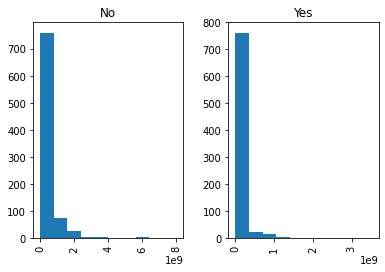

In [ ]:
dir_and_budg.hist(by ='New Director')

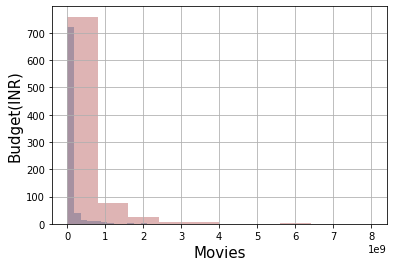

In [ ]:
import seaborn as sns
new.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
notnew.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Movies',fontsize=15)
plt.ylabel('Budget(INR)',fontsize=15)
plt.show()

In [ ]:
means_table = dir_and_budg.groupby('New Director').mean()
type(means_table)

pandas.core.frame.DataFrame

In [ ]:
means_table

,Budget(INR)
New Director,
No,3.752240e+08
Yes,8.911250e+07


In [ ]:
observed_difference = means_table['Budget(INR)'][1] - means_table['Budget(INR)'][0]

In [ ]:
observed_difference

-286111510.8194444

In [ ]:
dir_and_budg

,New Director,Budget(INR)
0,No,85000
1,No,825000
2,No,56700000
3,No,4500000
4,Yes,1075000
...,...,...
1693,Yes,88862500
1694,Yes,70000
1695,No,850000
1696,Yes,31065000


In [ ]:
shuffled = dir_and_budg.sample(1698,replace = False)
shuffled

,New Director,Budget(INR)
991,Yes,29525000
956,Yes,18100000
1069,Yes,194700000
757,Yes,525000
1356,No,255800000
...,...,...
251,No,450750000
1373,No,1477580000
791,Yes,2350000
1474,No,2200000


In [ ]:
shuffled_B = shuffled['Budget(INR)']
type(shuffled_B)


pandas.core.series.Series

In [ ]:
original_and_shuffled= dir_and_budg.assign(shuffled_B=shuffled_B.values )

In [ ]:
original_and_shuffled

,New Director,Budget(INR),shuffled_B
0,No,85000,29525000
1,No,825000,18100000
2,No,56700000,194700000
3,No,4500000,525000
4,Yes,1075000,255800000
...,...,...,...
1693,Yes,88862500,450750000
1694,Yes,70000,1477580000
1695,No,850000,2350000
1696,Yes,31065000,2200000


In [ ]:
all_group_means= original_and_shuffled.groupby('New Director').mean()
all_group_means

,Budget(INR),shuffled_B
New Director,,
No,3.752240e+08,2.434547e+08
Yes,8.911250e+07,2.315396e+08


In [ ]:
difference = all_group_means['Budget(INR)'][0]- all_group_means['Budget(INR)'][1]
difference

286111510.8194444

In [ ]:
dir_and_budg= df[['New Director', 'Budget(INR)']]
shuffled = dir_and_budg.sample(1698,replace = False)
shuffled_B = shuffled['Budget(INR)']
original_and_shuffled = dir_and_budg.assign(shuffled_B=shuffled_B.values )
all_group_means= original_and_shuffled.groupby('New Director').mean()
difference = all_group_means['shuffled_B'][0]- all_group_means['shuffled_B'][1]
difference

-34349151.3981176

In [ ]:
import numpy as np
differences = np.zeros(5000)

In [ ]:
for i in np.arange(5000):
  dir_and_budg= df[['New Director', 'Budget(INR)']]
  shuffled = dir_and_budg.sample(1698,replace = False)
  shuffled_B = shuffled['Budget(INR)']
  original_and_shuffled = dir_and_budg.assign(shuffled_B=shuffled_B.values )
  all_group_means= original_and_shuffled.groupby('New Director').mean()
  difference = all_group_means['shuffled_B'][0]- all_group_means['shuffled_B'][1]
  differences[i] = difference

In [ ]:
differences

array([ 20093688.7270658 ,   -189786.14850941,  15683707.01959118, ...,
       -69669591.93683308,  22850717.85229093,  -1963112.02531847])

In [ ]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,2.009369e+07
1,-1.897861e+05
2,1.568371e+07
3,5.078104e+07
4,-6.837803e+06
...,...
4995,2.308061e+06
4996,-1.475026e+07
4997,-6.966959e+07
4998,2.285072e+07


KeyboardInterrupt: ignored

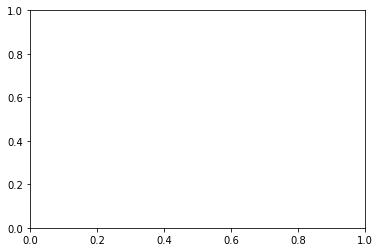

In [ ]:
differences_df.hist(bins = np.arange(-10000000,10000450,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)